# Video Classification Deep Learning using Pytorch

In [1]:
! pip install yt-dlp==2023.03.04

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.2 MB/s eta 0:00:00


See Library Versions

In [2]:
! pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
Brotli                        1.0.9
CacheControl                  0.12.11
cached-property               1.5.2
cach

Library Import

In [3]:
import numpy as np
import pandas as pd
import h5py
import zipfile
import cv2
import shutil
import zipfile
import os
import zipfile
import gc
import copy
import math
import warnings
import random
import os
from yt_dlp import YoutubeDL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import albumentations as A
import torchvision
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
# import pafy
import torch.utils.data as data_utils
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import PIL
import torch.utils.data as data_utils
import xml.etree.ElementTree as ET # Parse XML Data.

from scipy import ndimage
from PIL import Image
from torch.utils.data import Dataset
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.client import device_lib
from zipfile import ZipFile
from IPython import display
from torchvision import models, transforms
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder

## Data Preparation

In [4]:
! wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics400.tar.gz

--2023-04-12 13:30:27--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics400.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10634519 (10M) [application/octet-stream]
Saving to: ‘kinetics400.tar.gz’

kinetics400.tar.gz  100%[===================>]  10.14M  --.-KB/s    in 0.1s    

2023-04-12 13:30:27 (99.7 MB/s) - ‘kinetics400.tar.gz’ saved [10634519/10634519]



In [5]:
! tar -xvf './kinetics400.tar.gz'

kinetics400/
kinetics400/validate.csv
kinetics400/train.csv
kinetics400/test.json
kinetics400/test.csv
kinetics400/train.json
kinetics400/validate.json


## Data Preprocessing

Load the dataset.

In [6]:
dataset_path = "kinetics400"
train_df = pd.read_csv(f"{dataset_path}/train.csv")
train_df

,label,youtube_id,time_start,time_end,split
0,testifying,---QUuC4vJs,84,94,train
1,eating spaghetti,--3ouPhoy2A,20,30,train
2,dribbling basketball,--4-0ihtnBU,58,68,train
3,playing tennis,--56QUhyDQM,185,195,train
4,tap dancing,--6q_33gNew,132,142,train
...,...,...,...,...,...
216222,ice fishing,zzz0-zDYts8,80,90,train
216223,making a cake,zzzZycxdZHk,54,64,train
216224,washing dishes,zzz_3yWpTXo,0,10,train
216225,busking,zzzlyL61Fyo,13,23,train


In [7]:
val_df = pd.read_csv(f"{dataset_path}/validate.csv")
val_df

,label,youtube_id,time_start,time_end,split
0,javelin throw,--07WQ2iBlw,1,11,validate
1,flipping pancake,--33Lscn6sk,4,14,validate
2,playing saxophone,--7VUM9MKg4,136,146,validate
3,slapping,--7goKgS4kc,15,25,validate
4,making tea,--7qK_w-g3Y,185,195,validate
...,...,...,...,...,...
17722,dancing gangnam style,zyf4BkKrKXY,101,111,validate
17723,clay pottery making,zyhaT3wPCp8,97,107,validate
17724,folding clothes,zyloWArlaQ0,0,10,validate
17725,headbanging,zymA_6jZIz4,1,11,validate


Create Field Variables to reference fields in DataFrame.

In [54]:
label_field = "label"
youtube_id_field = "youtube_id"
time_start_field = "time_start"
time_end_field = "time_end"
split_field = "split"

## Data Analysis

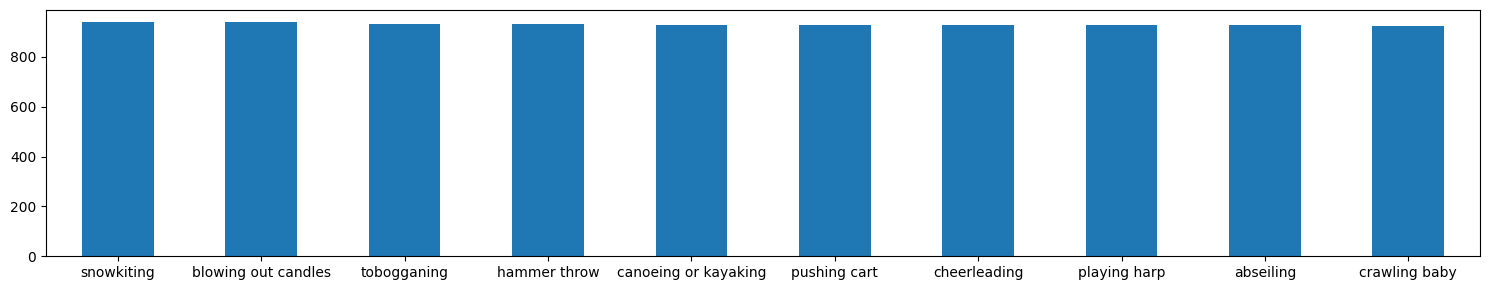

In [55]:
plt.figure(figsize = (15, 3))
plt.xticks(rotation = 45)
train_df[label_field].value_counts().head(10).plot(kind = "bar", rot = 0)
plt.tight_layout()

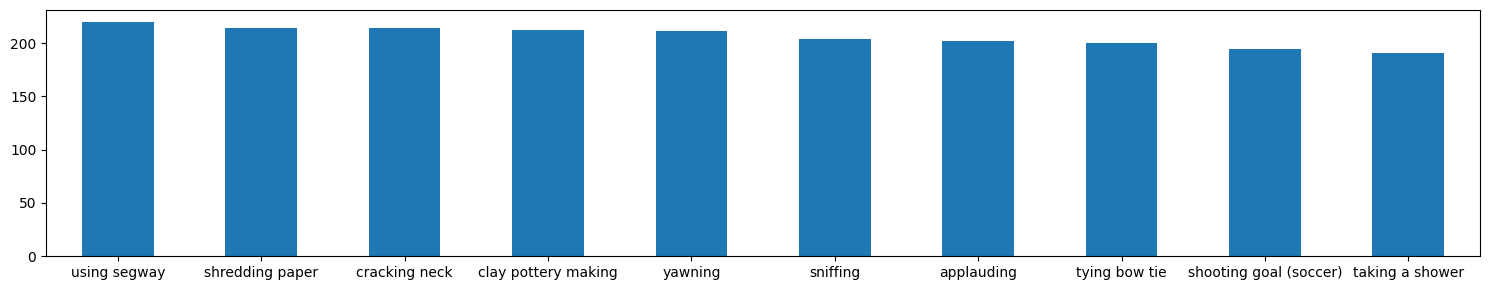

In [56]:
plt.figure(figsize = (15, 3))
plt.xticks(rotation = 45)
train_df[label_field].value_counts().tail(10).plot(kind = "bar", rot = 0)
plt.tight_layout()

Sample One Youtube Video.

In [53]:
sample_youtube_id = "--33Lscn6sk"
youtube_url = f"https://youtu.be/{sample_youtube_id}"

def get_youtube_statistic_from_url(video_url, columns_to_extract, ydl_opts):
   with YoutubeDL(ydl_opts) as ydl:
     # Get video information,
    result = ydl.extract_info(
        youtube_url,
        download = False,
    )

    if 'entries' in result:
      # Get only the first video, since we only care about the 1st video.
      FIRST_VIDEO_INDEX = 0
      video = result['entries'][FIRST_VIDEO_INDEX]
    else:
      # This is already the first video. Just instantly get the video!
      video = result
    
    data_df = pd.DataFrame.from_dict(
      result,
      orient = "index",
    ).T

    data_df = data_df[columns_to_extract]

    return data_df

def get_youtube_video(video_url, ydl_opts):
  with YoutubeDL(ydl_opts) as ydl:
    video = ydl.download(video_url)

    video_capture = cv2.VideoCapture()
    video_capture.open(best.url)

    while True:
      ret, frame = video_capture.read()
      if ret == True:
        cv2_imshow(frame)

    video_capture.release()
    cv2.destroyAllWindows()


columns_to_extract = ["id", "title", "width", "height", "format_id", "duration", "fps", "vbr"]
ydl_opts = {
  "quiet": True
}

video_analysis_df = pd.DataFrame(
    columns = columns_to_extract
)

sample_analysis_df = get_youtube_statistic_from_url(
  youtube_url, 
  columns_to_extract, 
  ydl_opts
)

video_analysis_df = pd.concat([video_analysis_df, sample_analysis_df], axis = 0)
video_analysis_df

,id,title,width,height,format_id,duration,fps,vbr
0,--33Lscn6sk,flipping a pancake,568,320,18,10,30,413.55


Make Directory for training and validation for keeping youtube videos.

In [52]:
! mkdir val
! mkdir train

Get the statistics of all train and validation datasets.

In [ ]:
columns_to_extract = ["id", "title", "width", "height", "format_id", "duration", "fps", "vbr"]

ydl_opts = {
  "quiet": True
}

video_analysis_df = pd.DataFrame(
    columns = columns_to_extract
)

save_video_analysis_name = "video_analysis.csv"

for index, row in train_df.iloc[1:].iterrows():
  print(f"Processing index: {index}")
  youtube_id = row[youtube_id_field]
  youtube_url = f"https://youtu.be/{youtube_id}"

  try:
    sample_analysis_df = get_youtube_statistic_from_url(
      youtube_url, 
      columns_to_extract, 
      ydl_opts
    )

    video_analysis_df = pd.concat([video_analysis_df, sample_analysis_df], axis = 0)

    video_analysis_df.to_csv(save_video_analysis_name, index = False)
  except Exception as e:
    print(f"Extractor Error: {e}")

Processing index: 0


ERROR: [youtube] ---QUuC4vJs: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] ---QUuC4vJs: Private video. Sign in if you've been granted access to this video
Processing index: 1
Processing index: 2
Processing index: 3
Processing index: 4
Processing index: 5
Processing index: 6
Processing index: 7
Processing index: 8
Processing index: 9


ERROR: [youtube] --TBx-Spzis: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] --TBx-Spzis: Private video. Sign in if you've been granted access to this video
Processing index: 10
Processing index: 11
Processing index: 12
Processing index: 13


ERROR: [youtube] --bO6XwZ9HI: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] --bO6XwZ9HI: Private video. Sign in if you've been granted access to this video
Processing index: 14
Processing index: 15
Processing index: 16


ERROR: [youtube] --jD1Yu5ZnQ: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] --jD1Yu5ZnQ: Private video. Sign in if you've been granted access to this video
Processing index: 17
Processing index: 18
Processing index: 19
Processing index: 20
Processing index: 21
Processing index: 22


ERROR: [youtube] --wGzXrj0SU: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] --wGzXrj0SU: Private video. Sign in if you've been granted access to this video
Processing index: 23
Processing index: 24
Processing index: 25
Processing index: 26
Processing index: 27
Processing index: 28
Processing index: 29
Processing index: 30
Processing index: 31
Processing index: 32
Processing index: 33
Processing index: 34
Processing index: 35
Processing index: 36
Processing index: 37
Processing index: 38
Processing index: 39
Processing index: 40
Processing index: 41
Processing index: 42
Processing index: 43
Processing index: 44
Processing index: 45
Processing index: 46
Processing index: 47
Processing index: 48
Processing index: 49
Processing index: 50
Processing index: 51
Processing index: 52
Processing index: 53
Processing index: 54
Processing index: 55
Processing index: 56


ERROR: [youtube] -1-tBHJnKu0: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -1-tBHJnKu0: Private video. Sign in if you've been granted access to this video
Processing index: 57
Processing index: 58
Processing index: 59
Processing index: 60
Processing index: 61
Processing index: 62
Processing index: 63
Processing index: 64
Processing index: 65
Processing index: 66
Processing index: 67
Processing index: 68
Processing index: 69
Processing index: 70
Processing index: 71
Processing index: 72
Processing index: 73
Processing index: 74


ERROR: [youtube] -1dWGnhjB2A: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -1dWGnhjB2A: Private video. Sign in if you've been granted access to this video
Processing index: 75
Processing index: 76


ERROR: [youtube] -1lKx46x_18: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -1lKx46x_18: Private video. Sign in if you've been granted access to this video
Processing index: 77
Processing index: 78
Processing index: 79
Processing index: 80
Processing index: 81
Processing index: 82
Processing index: 83
Processing index: 84
Processing index: 85


ERROR: [youtube] -22U1I2zQf4: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -22U1I2zQf4: Private video. Sign in if you've been granted access to this video
Processing index: 86
Processing index: 87
Processing index: 88
Processing index: 89
Processing index: 90
Processing index: 91
Processing index: 92
Processing index: 93
Processing index: 94
Processing index: 95
Processing index: 96
Processing index: 97
Processing index: 98
Processing index: 99
Processing index: 100
Processing index: 101
Processing index: 102
Processing index: 103
Processing index: 104
Processing index: 105
Processing index: 106
Processing index: 107
Processing index: 108
Processing index: 109
Processing index: 110
Processing index: 111
Processing index: 112
Processing index: 113
Processing index: 114
Processing index: 115
Processing index: 116
Processing index: 117
Processing index: 118
Processing index: 119
Processing index: 120
Processing index: 121
Processing index: 122
Processing index: 123
Processing index: 124
Processing index: 125
Processing index: 12

ERROR: [youtube] -3g_TFW76GI: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -3g_TFW76GI: Private video. Sign in if you've been granted access to this video
Processing index: 142
Processing index: 143
Processing index: 144
Processing index: 145
Processing index: 146
Processing index: 147
Processing index: 148
Processing index: 149
Processing index: 150
Processing index: 151


ERROR: [youtube] -3usVvvMGSY: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -3usVvvMGSY: Private video. Sign in if you've been granted access to this video
Processing index: 152
Processing index: 153
Processing index: 154
Processing index: 155
Processing index: 156
Processing index: 157
Processing index: 158
Processing index: 159
Processing index: 160


ERROR: [youtube] -48nAx22Iwk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -48nAx22Iwk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 161
Processing index: 162
Processing index: 163
Processing index: 164
Processing index: 165
Processing index: 166
Processing index: 167
Processing index: 168
Processing index: 169
Processing index: 170
Processing index: 171
Processing index: 172
Processing index: 173
Processing index: 174
Processing index: 175
Processing index: 176
Processing index: 177
Processing index: 178
Processing index: 179
Processing index: 180
Processing index: 181
Processing index: 182
Processing index: 183
Processing index: 184
Processing index: 185
Processing index: 186
Processing index: 187
Processing index: 188
Processing index: 189
Processing index: 190
Processing index: 191
Processing index: 192
Processing index: 193
Processing index: 194
Processing index: 195


ERROR: [youtube] -50M_ypyDWw: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -50M_ypyDWw: Private video. Sign in if you've been granted access to this video
Processing index: 196
Processing index: 197
Processing index: 198
Processing index: 199
Processing index: 200
Processing index: 201


Processing index: 202
Processing index: 203
Processing index: 204
Processing index: 205
Processing index: 206


ERROR: [youtube] -5E7gmuQ1D8: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -5E7gmuQ1D8: Private video. Sign in if you've been granted access to this video
Processing index: 207
Processing index: 208
Processing index: 209
Processing index: 210
Processing index: 211
Processing index: 212
Processing index: 213
Processing index: 214
Processing index: 215
Processing index: 216
Processing index: 217
Processing index: 218
Processing index: 219
Processing index: 220
Processing index: 221
Processing index: 222
Processing index: 223
Processing index: 224
Processing index: 225
Processing index: 226
Processing index: 227
Processing index: 228
Processing index: 229
Processing index: 230
Processing index: 231
Processing index: 232
Processing index: 233


ERROR: [youtube] -5rZ-3xLUEc: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


Extractor Error: ERROR: [youtube] -5rZ-3xLUEc: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds
Processing index: 234
Processing index: 235
Processing index: 236
Processing index: 237
Processing index: 238
Processing index: 239
Processing index: 240
Processing index: 241
Processing index: 242
Processing index: 243
Processing index: 244
Processing index: 245
Processing index: 246
Processing index: 247
Processing index: 248
Processing index: 249
Processing index: 250
Processing index: 251
Processing index: 252
Processing index: 253
Processing index: 254
Processing index: 255


ERROR: [youtube] -6VoGglIU3o: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -6VoGglIU3o: Private video. Sign in if you've been granted access to this video
Processing index: 256


ERROR: [youtube] -6VzhYhWDMY: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -6VzhYhWDMY: Private video. Sign in if you've been granted access to this video
Processing index: 257
Processing index: 258
Processing index: 259
Processing index: 260
Processing index: 261
Processing index: 262
Processing index: 263
Processing index: 264
Processing index: 265
Processing index: 266
Processing index: 267


ERROR: [youtube] -6oPU9T5y1I: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -6oPU9T5y1I: Private video. Sign in if you've been granted access to this video
Processing index: 268
Processing index: 269
Processing index: 270
Processing index: 271
Processing index: 272
Processing index: 273
Processing index: 274
Processing index: 275
Processing index: 276
Processing index: 277


ERROR: [youtube] -6wkYqjFei0: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -6wkYqjFei0: Private video. Sign in if you've been granted access to this video
Processing index: 278
Processing index: 279
Processing index: 280
Processing index: 281
Processing index: 282
Processing index: 283
Processing index: 284
Processing index: 285


ERROR: [youtube] -73SX7Svd2g: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -73SX7Svd2g: Private video. Sign in if you've been granted access to this video
Processing index: 286
Processing index: 287
Processing index: 288
Processing index: 289
Processing index: 290
Processing index: 291
Processing index: 292
Processing index: 293
Processing index: 294
Processing index: 295
Processing index: 296
Processing index: 297
Processing index: 298
Processing index: 299
Processing index: 300
Processing index: 301
Processing index: 302
Processing index: 303
Processing index: 304
Processing index: 305


ERROR: [youtube] -7lxDPdoTB0: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -7lxDPdoTB0: Private video. Sign in if you've been granted access to this video
Processing index: 306
Processing index: 307
Processing index: 308
Processing index: 309
Processing index: 310
Processing index: 311
Processing index: 312
Processing index: 313
Processing index: 314
Processing index: 315
Processing index: 316


ERROR: [youtube] -7wX0TAcnwc: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -7wX0TAcnwc: Private video. Sign in if you've been granted access to this video
Processing index: 317
Processing index: 318
Processing index: 319
Processing index: 320
Processing index: 321
Processing index: 322


ERROR: [youtube] -81JqO-EIo8: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -81JqO-EIo8: Private video. Sign in if you've been granted access to this video
Processing index: 323
Processing index: 324
Processing index: 325
Processing index: 326
Processing index: 327
Processing index: 328
Processing index: 329
Processing index: 330
Processing index: 331
Processing index: 332
Processing index: 333
Processing index: 334


ERROR: [youtube] -8M6XG8uP_o: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -8M6XG8uP_o: Private video. Sign in if you've been granted access to this video
Processing index: 335
Processing index: 336
Processing index: 337
Processing index: 338
Processing index: 339
Processing index: 340
Processing index: 341
Processing index: 342
Processing index: 343
Processing index: 344
Processing index: 345
Processing index: 346
Processing index: 347
Processing index: 348
Processing index: 349


ERROR: [youtube] -8k3AnXTBD8: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -8k3AnXTBD8: Private video. Sign in if you've been granted access to this video
Processing index: 350
Processing index: 351


ERROR: [youtube] -8khhEKByEM: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -8khhEKByEM: Private video. Sign in if you've been granted access to this video
Processing index: 352
Processing index: 353
Processing index: 354
Processing index: 355
Processing index: 356
Processing index: 357


ERROR: [youtube] -8rCdhZK7rE: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -8rCdhZK7rE: Private video. Sign in if you've been granted access to this video
Processing index: 358


ERROR: [youtube] -8x0TiXShoE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -8x0TiXShoE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 359
Processing index: 360
Processing index: 361
Processing index: 362


ERROR: [youtube] -90YUx0XA2w: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -90YUx0XA2w: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 363
Processing index: 364
Processing index: 365
Processing index: 366


ERROR: [youtube] -98DdKiwFi0: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -98DdKiwFi0: Private video. Sign in if you've been granted access to this video
Processing index: 367
Processing index: 368
Processing index: 369
Processing index: 370
Processing index: 371
Processing index: 372
Processing index: 373
Processing index: 374
Processing index: 375
Processing index: 376
Processing index: 377
Processing index: 378
Processing index: 379
Processing index: 380
Processing index: 381
Processing index: 382
Processing index: 383
Processing index: 384
Processing index: 385
Processing index: 386
Processing index: 387
Processing index: 388
Processing index: 389
Processing index: 390
Processing index: 391
Processing index: 392
Processing index: 393
Processing index: 394
Processing index: 395
Processing index: 396
Processing index: 397
Processing index: 398
Processing index: 399
Processing index: 400
Processing index: 401
Processing index: 402
Processing index: 403
Processing index: 404
Processing index: 405
Processing index: 406
Proces

ERROR: [youtube] -AexQV9MrLo: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -AexQV9MrLo: Private video. Sign in if you've been granted access to this video
Processing index: 432
Processing index: 433
Processing index: 434
Processing index: 435
Processing index: 436
Processing index: 437
Processing index: 438
Processing index: 439
Processing index: 440


ERROR: [youtube] -Av_nD6hvzo: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Av_nD6hvzo: Private video. Sign in if you've been granted access to this video
Processing index: 441
Processing index: 442
Processing index: 443
Processing index: 444
Processing index: 445
Processing index: 446
Processing index: 447
Processing index: 448
Processing index: 449
Processing index: 450
Processing index: 451
Processing index: 452
Processing index: 453
Processing index: 454
Processing index: 455
Processing index: 456
Processing index: 457
Processing index: 458
Processing index: 459
Processing index: 460
Processing index: 461
Processing index: 462


Processing index: 463
Processing index: 464
Processing index: 465
Processing index: 466
Processing index: 467


ERROR: [youtube] -BewRPAXatY: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -BewRPAXatY: Private video. Sign in if you've been granted access to this video
Processing index: 468
Processing index: 469
Processing index: 470
Processing index: 471
Processing index: 472
Processing index: 473
Processing index: 474
Processing index: 475
Processing index: 476
Processing index: 477


ERROR: [youtube] -BptOURMao8: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -BptOURMao8: Private video. Sign in if you've been granted access to this video
Processing index: 478
Processing index: 479
Processing index: 480
Processing index: 481


ERROR: [youtube] -C31RA1mTNM: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -C31RA1mTNM: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 482
Processing index: 483
Processing index: 484
Processing index: 485
Processing index: 486
Processing index: 487


ERROR: [youtube] -CDYMieF_a0: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -CDYMieF_a0: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 488
Processing index: 489
Processing index: 490
Processing index: 491
Processing index: 492
Processing index: 493
Processing index: 494
Processing index: 495
Processing index: 496
Processing index: 497


ERROR: [youtube] -CQ7GWxuEUc: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -CQ7GWxuEUc: Private video. Sign in if you've been granted access to this video
Processing index: 498
Processing index: 499
Processing index: 500
Processing index: 501
Processing index: 502


ERROR: [youtube] -CTvtfED6Ak: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -CTvtfED6Ak: Private video. Sign in if you've been granted access to this video
Processing index: 503
Processing index: 504
Processing index: 505
Processing index: 506
Processing index: 507
Processing index: 508
Processing index: 509
Processing index: 510
Processing index: 511
Processing index: 512
Processing index: 513
Processing index: 514
Processing index: 515
Processing index: 516
Processing index: 517
Processing index: 518
Processing index: 519
Processing index: 520
Processing index: 521


ERROR: [youtube] -CuDMAzj4AE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -CuDMAzj4AE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 522
Processing index: 523
Processing index: 524
Processing index: 525
Processing index: 526
Processing index: 527
Processing index: 528
Processing index: 529
Processing index: 530
Processing index: 531
Processing index: 532
Processing index: 533
Processing index: 534
Processing index: 535
Processing index: 536
Processing index: 537
Processing index: 538
Processing index: 539
Processing index: 540
Processing index: 541
Processing index: 542
Processing index: 543
Processing index: 544
Processing index: 545
Processing index: 546


ERROR: [youtube] -DWNUwTH1k8: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -DWNUwTH1k8: Private video. Sign in if you've been granted access to this video
Processing index: 547
Processing index: 548


ERROR: [youtube] -DZeoj_11pU: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -DZeoj_11pU: Private video. Sign in if you've been granted access to this video
Processing index: 549
Processing index: 550
Processing index: 551
Processing index: 552
Processing index: 553
Processing index: 554
Processing index: 555
Processing index: 556
Processing index: 557


ERROR: [youtube] -DsMpC5_-c4: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -DsMpC5_-c4: Private video. Sign in if you've been granted access to this video
Processing index: 558
Processing index: 559
Processing index: 560
Processing index: 561
Processing index: 562
Processing index: 563
Processing index: 564
Processing index: 565
Processing index: 566


ERROR: [youtube] -EA4rZuZRhI: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -EA4rZuZRhI: Private video. Sign in if you've been granted access to this video
Processing index: 567
Processing index: 568
Processing index: 569
Processing index: 570
Processing index: 571
Processing index: 572
Processing index: 573
Processing index: 574
Processing index: 575
Processing index: 576
Processing index: 577
Processing index: 578
Processing index: 579
Processing index: 580
Processing index: 581
Processing index: 582
Processing index: 583
Processing index: 584
Processing index: 585


ERROR: [youtube] -EnEIcYNn9Y: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -EnEIcYNn9Y: Private video. Sign in if you've been granted access to this video
Processing index: 586
Processing index: 587
Processing index: 588
Processing index: 589
Processing index: 590


ERROR: [youtube] -EwnDeu0BFw: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -EwnDeu0BFw: Private video. Sign in if you've been granted access to this video
Processing index: 591
Processing index: 592
Processing index: 593
Processing index: 594


ERROR: [youtube] -F3sjyWT0ts: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -F3sjyWT0ts: Private video. Sign in if you've been granted access to this video
Processing index: 595
Processing index: 596
Processing index: 597


ERROR: [youtube] -F9CiROL8dg: This video has been removed for violating YouTube's Community Guidelines


Extractor Error: ERROR: [youtube] -F9CiROL8dg: This video has been removed for violating YouTube's Community Guidelines
Processing index: 598
Processing index: 599
Processing index: 600
Processing index: 601
Processing index: 602
Processing index: 603
Processing index: 604
Processing index: 605
Processing index: 606
Processing index: 607
Processing index: 608
Processing index: 609
Processing index: 610
Processing index: 611


ERROR: [youtube] -FX7AD8Z2lc: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -FX7AD8Z2lc: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 612
Processing index: 613
Processing index: 614
Processing index: 615
Processing index: 616
Processing index: 617
Processing index: 618
Processing index: 619


ERROR: [youtube] -Fdh0lnvEk4: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Fdh0lnvEk4: Private video. Sign in if you've been granted access to this video
Processing index: 620
Processing index: 621
Processing index: 622
Processing index: 623


ERROR: [youtube] -FmQWfbHeEw: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -FmQWfbHeEw: Private video. Sign in if you've been granted access to this video
Processing index: 624
Processing index: 625
Processing index: 626
Processing index: 627
Processing index: 628
Processing index: 629
Processing index: 630
Processing index: 631
Processing index: 632
Processing index: 633
Processing index: 634
Processing index: 635
Processing index: 636
Processing index: 637
Processing index: 638
Processing index: 639
Processing index: 640
Processing index: 641
Processing index: 642
Processing index: 643
Processing index: 644
Processing index: 645
Processing index: 646
Processing index: 647


ERROR: [youtube] -GHljetcig4: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -GHljetcig4: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 648
Processing index: 649
Processing index: 650
Processing index: 651


ERROR: [youtube] -GL4Rp-F50k: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -GL4Rp-F50k: Private video. Sign in if you've been granted access to this video
Processing index: 652
Processing index: 653


ERROR: [youtube] -GMkZDHx5jg: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -GMkZDHx5jg: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 654
Processing index: 655
Processing index: 656
Processing index: 657
Processing index: 658
Processing index: 659


ERROR: [youtube] -GbUR6K-Q5M: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -GbUR6K-Q5M: Private video. Sign in if you've been granted access to this video
Processing index: 660
Processing index: 661
Processing index: 662
Processing index: 663
Processing index: 664
Processing index: 665
Processing index: 666
Processing index: 667
Processing index: 668
Processing index: 669
Processing index: 670
Processing index: 671
Processing index: 672
Processing index: 673
Processing index: 674
Processing index: 675
Processing index: 676
Processing index: 677
Processing index: 678
Processing index: 679
Processing index: 680
Processing index: 681
Processing index: 682
Processing index: 683
Processing index: 684
Processing index: 685
Processing index: 686
Processing index: 687
Processing index: 688
Processing index: 689


ERROR: [youtube] -HQYQtBB57w: This video has been removed for violating YouTube's Community Guidelines


Extractor Error: ERROR: [youtube] -HQYQtBB57w: This video has been removed for violating YouTube's Community Guidelines
Processing index: 690
Processing index: 691
Processing index: 692
Processing index: 693


ERROR: [youtube] -HZgX7HmcHg: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -HZgX7HmcHg: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 694
Processing index: 695
Processing index: 696
Processing index: 697
Processing index: 698


ERROR: [youtube] -HkrU56u7nQ: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -HkrU56u7nQ: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 699
Processing index: 700
Processing index: 701
Processing index: 702
Processing index: 703
Processing index: 704


ERROR: [youtube] -HttSia1uHE: Video unavailable


Extractor Error: ERROR: [youtube] -HttSia1uHE: Video unavailable
Processing index: 705
Processing index: 706
Processing index: 707
Processing index: 708
Processing index: 709
Processing index: 710
Processing index: 711
Processing index: 712
Processing index: 713
Processing index: 714
Processing index: 715
Processing index: 716
Processing index: 717
Processing index: 718
Processing index: 719
Processing index: 720
Processing index: 721
Processing index: 722
Processing index: 723
Processing index: 724
Processing index: 725
Processing index: 726
Processing index: 727
Processing index: 728
Processing index: 729
Processing index: 730
Processing index: 731
Processing index: 732
Processing index: 733
Processing index: 734
Processing index: 735
Processing index: 736
Processing index: 737
Processing index: 738
Processing index: 739
Processing index: 740
Processing index: 741
Processing index: 742
Processing index: 743
Processing index: 744
Processing index: 745
Processing index: 746
Processing 

ERROR: [youtube] -JwcLMulYoc: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -JwcLMulYoc: Private video. Sign in if you've been granted access to this video
Processing index: 797
Processing index: 798
Processing index: 799
Processing index: 800
Processing index: 801
Processing index: 802
Processing index: 803
Processing index: 804
Processing index: 805
Processing index: 806
Processing index: 807
Processing index: 808
Processing index: 809
Processing index: 810
Processing index: 811
Processing index: 812
Processing index: 813
Processing index: 814


ERROR: [youtube] -KHIKaCGKBY: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -KHIKaCGKBY: Private video. Sign in if you've been granted access to this video
Processing index: 815
Processing index: 816
Processing index: 817
Processing index: 818
Processing index: 819
Processing index: 820


ERROR: [youtube] -KPNrGuq6UY: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -KPNrGuq6UY: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 821
Processing index: 822
Processing index: 823
Processing index: 824
Processing index: 825


ERROR: [youtube] -KSjQxE1QCk: Video unavailable


Extractor Error: ERROR: [youtube] -KSjQxE1QCk: Video unavailable
Processing index: 826
Processing index: 827
Processing index: 828
Processing index: 829
Processing index: 830
Processing index: 831
Processing index: 832
Processing index: 833
Processing index: 834
Processing index: 835
Processing index: 836
Processing index: 837
Processing index: 838
Processing index: 839
Processing index: 840
Processing index: 841
Processing index: 842
Processing index: 843
Processing index: 844


ERROR: [youtube] -Ksa9zLMykA: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Ksa9zLMykA: Private video. Sign in if you've been granted access to this video
Processing index: 845


ERROR: [youtube] -KtT7Q730Yg: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -KtT7Q730Yg: Private video. Sign in if you've been granted access to this video
Processing index: 846
Processing index: 847
Processing index: 848
Processing index: 849
Processing index: 850
Processing index: 851
Processing index: 852
Processing index: 853
Processing index: 854
Processing index: 855
Processing index: 856
Processing index: 857
Processing index: 858
Processing index: 859
Processing index: 860
Processing index: 861
Processing index: 862
Processing index: 863
Processing index: 864
Processing index: 865
Processing index: 866
Processing index: 867
Processing index: 868
Processing index: 869
Processing index: 870
Processing index: 871
Processing index: 872
Processing index: 873
Processing index: 874
Processing index: 875
Processing index: 876
Processing index: 877
Processing index: 878
Processing index: 879
Processing index: 880
Processing index: 881
Processing index: 882
Processing index: 883
Processing index: 884
Processing index: 885
Proces

ERROR: [youtube] -L_FS1uasMo: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -L_FS1uasMo: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 893
Processing index: 894
Processing index: 895


ERROR: [youtube] -LbmsAhfpmk: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -LbmsAhfpmk: Private video. Sign in if you've been granted access to this video
Processing index: 896
Processing index: 897
Processing index: 898
Processing index: 899
Processing index: 900
Processing index: 901
Processing index: 902


ERROR: [youtube] -Lmz43iEHa4: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -Lmz43iEHa4: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 903
Processing index: 904
Processing index: 905
Processing index: 906
Processing index: 907
Processing index: 908
Processing index: 909
Processing index: 910
Processing index: 911
Processing index: 912
Processing index: 913
Processing index: 914
Processing index: 915
Processing index: 916
Processing index: 917
Processing index: 918
Processing index: 919
Processing index: 920
Processing index: 921
Processing index: 922
Processing index: 923
Processing index: 924


ERROR: [youtube] -MQMUIUkw0I: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -MQMUIUkw0I: Private video. Sign in if you've been granted access to this video
Processing index: 925
Processing index: 926
Processing index: 927
Processing index: 928
Processing index: 929
Processing index: 930
Processing index: 931
Processing index: 932
Processing index: 933
Processing index: 934
Processing index: 935
Processing index: 936
Processing index: 937
Processing index: 938
Processing index: 939
Processing index: 940
Processing index: 941
Processing index: 942
Processing index: 943
Processing index: 944
Processing index: 945
Processing index: 946
Processing index: 947
Processing index: 948
Processing index: 949
Processing index: 950
Processing index: 951
Processing index: 952
Processing index: 953
Processing index: 954
Processing index: 955
Processing index: 956
Processing index: 957
Processing index: 958
Processing index: 959
Processing index: 960
Processing index: 961
Processing index: 962
Processing index: 963
Processing index: 964
Proces

ERROR: [youtube] -NYvR9wYuNk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -NYvR9wYuNk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 998
Processing index: 999
Processing index: 1000
Processing index: 1001
Processing index: 1002
Processing index: 1003
Processing index: 1004
Processing index: 1005
Processing index: 1006
Processing index: 1007
Processing index: 1008
Processing index: 1009
Processing index: 1010
Processing index: 1011
Processing index: 1012
Processing index: 1013
Processing index: 1014
Processing index: 1015
Processing index: 1016
Processing index: 1017
Processing index: 1018
Processing index: 1019
Processing index: 1020
Processing index: 1021
Processing index: 1022
Processing index: 1023
Processing index: 1024


ERROR: [youtube] -O3nQR_EvGQ: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -O3nQR_EvGQ: Private video. Sign in if you've been granted access to this video
Processing index: 1025
Processing index: 1026
Processing index: 1027
Processing index: 1028
Processing index: 1029
Processing index: 1030
Processing index: 1031
Processing index: 1032
Processing index: 1033
Processing index: 1034
Processing index: 1035
Processing index: 1036
Processing index: 1037
Processing index: 1038
Processing index: 1039


ERROR: [youtube] -OG3oX9peUU: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -OG3oX9peUU: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1040
Processing index: 1041
Processing index: 1042
Processing index: 1043
Processing index: 1044
Processing index: 1045
Processing index: 1046
Processing index: 1047
Processing index: 1048
Processing index: 1049
Processing index: 1050
Processing index: 1051
Processing index: 1052
Processing index: 1053
Processing index: 1054
Processing index: 1055
Processing index: 1056
Processing index: 1057
Processing index: 1058
Processing index: 1059
Processing index: 1060
Processing index: 1061
Processing index: 1062
Processing index: 1063
Processing index: 1064
Processing index: 1065
Processing index: 1066
Processing index: 1067
Processing index: 1068
Processing index: 1069
Processing index: 1070
Processing index: 1071
Processing index: 1072
Processing index: 1073
Processing index: 1074
Processing index: 1

ERROR: [youtube] -P25fJtNZUI: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -P25fJtNZUI: Private video. Sign in if you've been granted access to this video
Processing index: 1079
Processing index: 1080
Processing index: 1081
Processing index: 1082
Processing index: 1083
Processing index: 1084
Processing index: 1085
Processing index: 1086
Processing index: 1087
Processing index: 1088
Processing index: 1089
Processing index: 1090
Processing index: 1091


ERROR: [youtube] -PFm3Yfl1Js: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


Extractor Error: ERROR: [youtube] -PFm3Yfl1Js: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds
Processing index: 1092
Processing index: 1093
Processing index: 1094
Processing index: 1095
Processing index: 1096
Processing index: 1097


ERROR: [youtube] -PLY-Bl2b4o: Video unavailable. This video contains content from International Olympic Committee, who has blocked it on copyright grounds


Extractor Error: ERROR: [youtube] -PLY-Bl2b4o: Video unavailable. This video contains content from International Olympic Committee, who has blocked it on copyright grounds
Processing index: 1098
Processing index: 1099


ERROR: [youtube] -PNcaCDLaFw: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -PNcaCDLaFw: Private video. Sign in if you've been granted access to this video
Processing index: 1100
Processing index: 1101
Processing index: 1102
Processing index: 1103
Processing index: 1104
Processing index: 1105
Processing index: 1106


ERROR: [youtube] -PY7nPHeVx8: This video has been removed for violating YouTube's Community Guidelines


Extractor Error: ERROR: [youtube] -PY7nPHeVx8: This video has been removed for violating YouTube's Community Guidelines
Processing index: 1107
Processing index: 1108
Processing index: 1109
Processing index: 1110
Processing index: 1111
Processing index: 1112
Processing index: 1113
Processing index: 1114


ERROR: [youtube] -PlgLnJOhnA: This video has been removed for violating YouTube's Terms of Service


Extractor Error: ERROR: [youtube] -PlgLnJOhnA: This video has been removed for violating YouTube's Terms of Service
Processing index: 1115
Processing index: 1116
Processing index: 1117
Processing index: 1118
Processing index: 1119
Processing index: 1120
Processing index: 1121
Processing index: 1122
Processing index: 1123
Processing index: 1124
Processing index: 1125
Processing index: 1126


ERROR: [youtube] -Q556CWYeHE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -Q556CWYeHE: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1127
Processing index: 1128


ERROR: [youtube] -Q78VJXH1ls: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Q78VJXH1ls: Private video. Sign in if you've been granted access to this video
Processing index: 1129
Processing index: 1130
Processing index: 1131
Processing index: 1132
Processing index: 1133
Processing index: 1134
Processing index: 1135
Processing index: 1136
Processing index: 1137
Processing index: 1138
Processing index: 1139
Processing index: 1140
Processing index: 1141
Processing index: 1142
Processing index: 1143
Processing index: 1144
Processing index: 1145
Processing index: 1146
Processing index: 1147
Processing index: 1148
Processing index: 1149
Processing index: 1150
Processing index: 1151
Processing index: 1152
Processing index: 1153
Processing index: 1154
Processing index: 1155
Processing index: 1156
Processing index: 1157
Processing index: 1158
Processing index: 1159
Processing index: 1160
Processing index: 1161
Processing index: 1162
Processing index: 1163
Processing index: 1164
Processing index: 1165
Processing index: 1166
Processing i

ERROR: [youtube] -Qr58HymVsE: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Qr58HymVsE: Private video. Sign in if you've been granted access to this video
Processing index: 1179
Processing index: 1180
Processing index: 1181
Processing index: 1182
Processing index: 1183
Processing index: 1184
Processing index: 1185
Processing index: 1186
Processing index: 1187
Processing index: 1188
Processing index: 1189
Processing index: 1190
Processing index: 1191
Processing index: 1192
Processing index: 1193
Processing index: 1194
Processing index: 1195
Processing index: 1196


ERROR: [youtube] -R8Bk4an_TM: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -R8Bk4an_TM: Private video. Sign in if you've been granted access to this video
Processing index: 1197
Processing index: 1198
Processing index: 1199
Processing index: 1200
Processing index: 1201
Processing index: 1202
Processing index: 1203


ERROR: [youtube] -RFE2ooHlgM: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -RFE2ooHlgM: Private video. Sign in if you've been granted access to this video
Processing index: 1204
Processing index: 1205


ERROR: [youtube] -RJiqilN2Ic: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -RJiqilN2Ic: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1206
Processing index: 1207
Processing index: 1208
Processing index: 1209
Processing index: 1210
Processing index: 1211
Processing index: 1212
Processing index: 1213
Processing index: 1214
Processing index: 1215
Processing index: 1216
Processing index: 1217
Processing index: 1218
Processing index: 1219
Processing index: 1220


ERROR: [youtube] -RZu0saT-50: Video unavailable. This video is unavailable


Extractor Error: ERROR: [youtube] -RZu0saT-50: Video unavailable. This video is unavailable
Processing index: 1221


ERROR: [youtube] -RaSdJaGdYA: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -RaSdJaGdYA: Private video. Sign in if you've been granted access to this video
Processing index: 1222
Processing index: 1223
Processing index: 1224


ERROR: [youtube] -RdPsVc6psA: Video unavailable


Extractor Error: ERROR: [youtube] -RdPsVc6psA: Video unavailable
Processing index: 1225
Processing index: 1226
Processing index: 1227
Processing index: 1228
Processing index: 1229
Processing index: 1230
Processing index: 1231


ERROR: [youtube] -RhSMyvSxQA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -RhSMyvSxQA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1232
Processing index: 1233
Processing index: 1234
Processing index: 1235
Processing index: 1236
Processing index: 1237
Processing index: 1238
Processing index: 1239
Processing index: 1240
Processing index: 1241
Processing index: 1242
Processing index: 1243
Processing index: 1244
Processing index: 1245


ERROR: [youtube] -S3q1fQtVmY: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -S3q1fQtVmY: Private video. Sign in if you've been granted access to this video
Processing index: 1246
Processing index: 1247
Processing index: 1248
Processing index: 1249
Processing index: 1250
Processing index: 1251
Processing index: 1252
Processing index: 1253
Processing index: 1254
Processing index: 1255


ERROR: [youtube] -SIJLK07FM0: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -SIJLK07FM0: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1256
Processing index: 1257
Processing index: 1258
Processing index: 1259


ERROR: [youtube] -SPQRdR4MY4: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -SPQRdR4MY4: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1260
Processing index: 1261
Processing index: 1262
Processing index: 1263


ERROR: [youtube] -SWG69JZ_vk: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -SWG69JZ_vk: Private video. Sign in if you've been granted access to this video
Processing index: 1264
Processing index: 1265
Processing index: 1266
Processing index: 1267
Processing index: 1268
Processing index: 1269
Processing index: 1270
Processing index: 1271
Processing index: 1272
Processing index: 1273
Processing index: 1274
Processing index: 1275
Processing index: 1276
Processing index: 1277
Processing index: 1278
Processing index: 1279
Processing index: 1280
Processing index: 1281
Processing index: 1282
Processing index: 1283
Processing index: 1284
Processing index: 1285
Processing index: 1286
Processing index: 1287


ERROR: [youtube] -T9sKB7WtxU: Video unavailable


Processing index: 1288
Extractor Error: ERROR: [youtube] -T9sKB7WtxU: Video unavailable
Processing index: 1289
Processing index: 1290
Processing index: 1291
Processing index: 1292
Processing index: 1293
Processing index: 1294
Processing index: 1295
Processing index: 1296
Processing index: 1297
Processing index: 1298
Processing index: 1299
Processing index: 1300
Processing index: 1301
Processing index: 1302
Processing index: 1303


ERROR: [youtube] -TJliuI2obY: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -TJliuI2obY: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1304
Processing index: 1305
Processing index: 1306
Processing index: 1307
Processing index: 1308
Processing index: 1309
Processing index: 1310
Processing index: 1311
Processing index: 1312
Processing index: 1313


ERROR: [youtube] -TTSwfAriM4: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -TTSwfAriM4: Private video. Sign in if you've been granted access to this video
Processing index: 1314
Processing index: 1315
Processing index: 1316
Processing index: 1317
Processing index: 1318
Processing index: 1319


ERROR: [youtube] -TmDgLoJDdw: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -TmDgLoJDdw: Private video. Sign in if you've been granted access to this video
Processing index: 1320
Processing index: 1321
Processing index: 1322
Processing index: 1323
Processing index: 1324
Processing index: 1325
Processing index: 1326
Processing index: 1327
Processing index: 1328
Processing index: 1329
Processing index: 1330
Processing index: 1331
Processing index: 1332
Processing index: 1333
Processing index: 1334
Processing index: 1335
Processing index: 1336
Processing index: 1337
Processing index: 1338
Processing index: 1339
Processing index: 1340
Processing index: 1341
Processing index: 1342


ERROR: [youtube] -UIei6eyzuk: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -UIei6eyzuk: Private video. Sign in if you've been granted access to this video
Processing index: 1343
Processing index: 1344
Processing index: 1345
Processing index: 1346
Processing index: 1347
Processing index: 1348
Processing index: 1349
Processing index: 1350
Processing index: 1351
Processing index: 1352
Processing index: 1353
Processing index: 1354
Processing index: 1355
Processing index: 1356
Processing index: 1357
Processing index: 1358
Processing index: 1359


ERROR: [youtube] -UoYdJyym84: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -UoYdJyym84: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1360
Processing index: 1361
Processing index: 1362
Processing index: 1363
Processing index: 1364
Processing index: 1365
Processing index: 1366


ERROR: [youtube] -V-mROa0TzQ: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -V-mROa0TzQ: Private video. Sign in if you've been granted access to this video
Processing index: 1367
Processing index: 1368
Processing index: 1369
Processing index: 1370
Processing index: 1371
Processing index: 1372
Processing index: 1373
Processing index: 1374
Processing index: 1375
Processing index: 1376
Processing index: 1377


ERROR: [youtube] -VLYS339Eis: This video has been removed for violating YouTube's policy on harassment and bullying


Extractor Error: ERROR: [youtube] -VLYS339Eis: This video has been removed for violating YouTube's policy on harassment and bullying
Processing index: 1378
Processing index: 1379
Processing index: 1380


ERROR: [youtube] -VOVRnLZVak: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -VOVRnLZVak: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1381
Processing index: 1382
Processing index: 1383
Processing index: 1384
Processing index: 1385
Processing index: 1386
Processing index: 1387
Processing index: 1388
Processing index: 1389
Processing index: 1390
Processing index: 1391
Processing index: 1392
Processing index: 1393
Processing index: 1394
Processing index: 1395
Processing index: 1396
Processing index: 1397
Processing index: 1398
Processing index: 1399
Processing index: 1400
Processing index: 1401
Processing index: 1402
Processing index: 1403
Processing index: 1404
Processing index: 1405
Processing index: 1406
Processing index: 1407


ERROR: [youtube] -W-DAzcFlfc: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -W-DAzcFlfc: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1408
Processing index: 1409
Processing index: 1410
Processing index: 1411
Processing index: 1412
Processing index: 1413
Processing index: 1414
Processing index: 1415
Processing index: 1416


ERROR: [youtube] -W2F4DK1t2s: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -W2F4DK1t2s: Private video. Sign in if you've been granted access to this video
Processing index: 1417
Processing index: 1418


ERROR: [youtube] -W53pl92itE: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -W53pl92itE: Private video. Sign in if you've been granted access to this video
Processing index: 1419
Processing index: 1420
Processing index: 1421
Processing index: 1422
Processing index: 1423
Processing index: 1424
Processing index: 1425
Processing index: 1426
Processing index: 1427
Processing index: 1428
Processing index: 1429
Processing index: 1430
Processing index: 1431
Processing index: 1432
Processing index: 1433
Processing index: 1434
Processing index: 1435
Processing index: 1436
Processing index: 1437
Processing index: 1438
Processing index: 1439
Processing index: 1440
Processing index: 1441
Processing index: 1442
Processing index: 1443
Processing index: 1444
Processing index: 1445
Processing index: 1446
Processing index: 1447
Processing index: 1448
Processing index: 1449
Processing index: 1450
Processing index: 1451
Processing index: 1452
Processing index: 1453


ERROR: [youtube] -WrKlvp_x_0: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -WrKlvp_x_0: Private video. Sign in if you've been granted access to this video
Processing index: 1454
Processing index: 1455


ERROR: [youtube] -Wskln4JY8s: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Wskln4JY8s: Private video. Sign in if you've been granted access to this video
Processing index: 1456
Processing index: 1457
Processing index: 1458
Processing index: 1459
Processing index: 1460
Processing index: 1461
Processing index: 1462
Processing index: 1463
Processing index: 1464


ERROR: [youtube] -WyWLsZGqgo: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -WyWLsZGqgo: Private video. Sign in if you've been granted access to this video
Processing index: 1465
Processing index: 1466
Processing index: 1467
Processing index: 1468
Processing index: 1469
Processing index: 1470
Processing index: 1471
Processing index: 1472
Processing index: 1473
Processing index: 1474
Processing index: 1475
Processing index: 1476
Processing index: 1477
Processing index: 1478
Processing index: 1479
Processing index: 1480
Processing index: 1481
Processing index: 1482
Processing index: 1483
Processing index: 1484
Processing index: 1485
Processing index: 1486
Processing index: 1487
Processing index: 1488
Processing index: 1489
Processing index: 1490
Processing index: 1491
Processing index: 1492
Processing index: 1493
Processing index: 1494
Processing index: 1495
Processing index: 1496
Processing index: 1497
Processing index: 1498
Processing index: 1499
Processing index: 1500
Processing index: 1501
Processing index: 1502
Processing i

ERROR: [youtube] -XlLk8fmJkM: This video has been removed for violating YouTube's Community Guidelines


Extractor Error: ERROR: [youtube] -XlLk8fmJkM: This video has been removed for violating YouTube's Community Guidelines
Processing index: 1505
Processing index: 1506
Processing index: 1507
Processing index: 1508


ERROR: [youtube] -XmBkxUhfMQ: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -XmBkxUhfMQ: Private video. Sign in if you've been granted access to this video
Processing index: 1509
Processing index: 1510


ERROR: [youtube] -XoRyRfUtaU: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -XoRyRfUtaU: Private video. Sign in if you've been granted access to this video
Processing index: 1511
Processing index: 1512
Processing index: 1513
Processing index: 1514
Processing index: 1515
Processing index: 1516
Processing index: 1517
Processing index: 1518
Processing index: 1519
Processing index: 1520
Processing index: 1521
Processing index: 1522
Processing index: 1523
Processing index: 1524
Processing index: 1525
Processing index: 1526
Processing index: 1527
Processing index: 1528
Processing index: 1529
Processing index: 1530
Processing index: 1531
Processing index: 1532
Processing index: 1533


ERROR: [youtube] -YM-YVy0Q-E: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -YM-YVy0Q-E: Private video. Sign in if you've been granted access to this video
Processing index: 1534
Processing index: 1535
Processing index: 1536
Processing index: 1537
Processing index: 1538
Processing index: 1539


ERROR: [youtube] -YRNnILulyI: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -YRNnILulyI: Private video. Sign in if you've been granted access to this video
Processing index: 1540
Processing index: 1541
Processing index: 1542
Processing index: 1543
Processing index: 1544
Processing index: 1545
Processing index: 1546
Processing index: 1547
Processing index: 1548
Processing index: 1549
Processing index: 1550
Processing index: 1551
Processing index: 1552
Processing index: 1553
Processing index: 1554
Processing index: 1555
Processing index: 1556
Processing index: 1557
Processing index: 1558
Processing index: 1559


ERROR: [youtube] -YtMJtz0C0Y: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


Extractor Error: ERROR: [youtube] -YtMJtz0C0Y: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing index: 1560
Processing index: 1561
Processing index: 1562


ERROR: [youtube] -Z-KvgyNArU: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Z-KvgyNArU: Private video. Sign in if you've been granted access to this video
Processing index: 1563
Processing index: 1564
Processing index: 1565
Processing index: 1566
Processing index: 1567
Processing index: 1568
Processing index: 1569
Processing index: 1570
Processing index: 1571
Processing index: 1572
Processing index: 1573
Processing index: 1574


ERROR: [youtube] -ZEFTYa0ViE: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -ZEFTYa0ViE: Private video. Sign in if you've been granted access to this video
Processing index: 1575
Processing index: 1576
Processing index: 1577
Processing index: 1578
Processing index: 1579


ERROR: [youtube] -ZFww1qGkJs: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -ZFww1qGkJs: Private video. Sign in if you've been granted access to this video
Processing index: 1580
Processing index: 1581
Processing index: 1582
Processing index: 1583
Processing index: 1584
Processing index: 1585
Processing index: 1586
Processing index: 1587
Processing index: 1588
Processing index: 1589
Processing index: 1590
Processing index: 1591
Processing index: 1592
Processing index: 1593
Processing index: 1594
Processing index: 1595
Processing index: 1596


ERROR: [youtube] -Zbyct6kC_U: This video has been removed for violating YouTube's Community Guidelines


Extractor Error: ERROR: [youtube] -Zbyct6kC_U: This video has been removed for violating YouTube's Community Guidelines
Processing index: 1597
Processing index: 1598
Processing index: 1599


ERROR: [youtube] -Zedueym2Fo: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -Zedueym2Fo: Private video. Sign in if you've been granted access to this video
Processing index: 1600
Processing index: 1601
Processing index: 1602
Processing index: 1603
Processing index: 1604
Processing index: 1605
Processing index: 1606
Processing index: 1607
Processing index: 1608
Processing index: 1609
Processing index: 1610
Processing index: 1611
Processing index: 1612


ERROR: [youtube] -ZwjVaXoHt4: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -ZwjVaXoHt4: Private video. Sign in if you've been granted access to this video
Processing index: 1613
Processing index: 1614
Processing index: 1615
Processing index: 1616
Processing index: 1617
Processing index: 1618
Processing index: 1619
Processing index: 1620
Processing index: 1621
Processing index: 1622
Processing index: 1623


ERROR: [youtube] -_Hhe9Sq9kk: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -_Hhe9Sq9kk: Private video. Sign in if you've been granted access to this video
Processing index: 1624


ERROR: [youtube] -_Jxkbje5sI: This video has been removed for violating YouTube's Community Guidelines


Extractor Error: ERROR: [youtube] -_Jxkbje5sI: This video has been removed for violating YouTube's Community Guidelines
Processing index: 1625
Processing index: 1626
Processing index: 1627
Processing index: 1628
Processing index: 1629


ERROR: [youtube] -_Rkkl9E2eI: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -_Rkkl9E2eI: Private video. Sign in if you've been granted access to this video
Processing index: 1630
Processing index: 1631
Processing index: 1632
Processing index: 1633
Processing index: 1634
Processing index: 1635
Processing index: 1636
Processing index: 1637
Processing index: 1638
Processing index: 1639
Processing index: 1640


ERROR: [youtube] -_ilebHA71w: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -_ilebHA71w: Private video. Sign in if you've been granted access to this video
Processing index: 1641
Processing index: 1642


ERROR: [youtube] -_kGjXO7bg4: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -_kGjXO7bg4: Private video. Sign in if you've been granted access to this video
Processing index: 1643
Processing index: 1644
Processing index: 1645
Processing index: 1646
Processing index: 1647
Processing index: 1648
Processing index: 1649
Processing index: 1650


ERROR: [youtube] -_sZfHi_G7c: Private video. Sign in if you've been granted access to this video


Extractor Error: ERROR: [youtube] -_sZfHi_G7c: Private video. Sign in if you've been granted access to this video
Processing index: 1651
Processing index: 1652
Processing index: 1653
